# LENDING CLUB CASE STUDY

## Importing Necessary Library

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df_loan=pd.read_csv('loan.csv')

In [3]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


-------------
### Dropping the duplicate rows

In [5]:
df_loan.shape

(39717, 111)

In [6]:
duplicate_rows_df = df_loan[df_loan.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 111)


There is no duplicate rows

-----
### Missing Value check

In [7]:
# find columns with missing data
columns_with_missing_data =df_loan.columns[df_loan.isnull().any()]

In [8]:
# Calculate the percentage of missing data for each column
columns_with_missing_data=df_loan[columns_with_missing_data].isnull().mean() * 100

In [9]:
#find column missing values > 90%
high_missing_value=columns_with_missing_data[columns_with_missing_data > 90]

In [10]:
high_missing_value.shape

(56,)

In [11]:
# Drop columns >= 90% of missing values
df_loan = df_loan.drop(high_missing_value.index, axis=1)

In [12]:
df_loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

### Important Columns for Analysis and Their Types<br>
* annual_inc: Numerical
* application_type: Categorical
* dti: Numerical
* emp_length: Categorical
* home_ownership: Categorical
* inq_last_6mths: Numerical
* installment: Numerical
* int_rate: Numerical
* loan_amnt: Numerical
* loan_status: Categorical
* pub_rec: Numerical
* purpose: Categorical
* term: Categorical

In [20]:
loan_df = df_loan[['annual_inc','application_type','dti','emp_length','home_ownership','inq_last_6mths','installment','int_rate','loan_amnt','loan_status','pub_rec','purpose','term']]

In [23]:
categorical_cols= ['application_type','emp_length','home_ownership','loan_status','purpose','term']
continuous_cols=['annual_inc','dti','inq_last_6mths','installment','int_rate','loan_amnt','pub_rec']

In [30]:
loan_df[categorical_cols].dtypes

application_type    object
emp_length          object
home_ownership      object
loan_status         object
purpose             object
term                object
dtype: object

In [31]:
loan_df[continuous_cols].dtypes

annual_inc        float64
dti               float64
inq_last_6mths      int64
installment       float64
int_rate           object
loan_amnt           int64
pub_rec             int64
dtype: object

In [34]:
# Remove % from the 'revol_util' and covert it to float
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%').astype('float')

In [36]:
# check missing value percentage for each column again
(100 * loan_df.isnull().mean()).round(2)

annual_inc          0.00
application_type    0.00
dti                 0.00
emp_length          2.71
home_ownership      0.00
inq_last_6mths      0.00
installment         0.00
int_rate            0.00
loan_amnt           0.00
loan_status         0.00
pub_rec             0.00
purpose             0.00
term                0.00
dtype: float64

In [37]:
# find mode value for emp_length as emp_length 
mode_emp_length=loan_df['emp_length'].mode()[0]

In [38]:
mode_emp_length


'10+ years'

In [39]:
#Refill missing values in emp_length with mode value
loan_df['emp_length'].fillna(mode_emp_length, inplace=True)

In [40]:
# calculate missing value percentage for each column
(100 * loan_df.isnull().mean()).round(2)

annual_inc          0.0
application_type    0.0
dti                 0.0
emp_length          0.0
home_ownership      0.0
inq_last_6mths      0.0
installment         0.0
int_rate            0.0
loan_amnt           0.0
loan_status         0.0
pub_rec             0.0
purpose             0.0
term                0.0
dtype: float64

--------------------
## Univariate analysis

### Numerical 

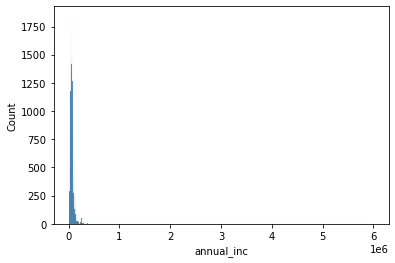

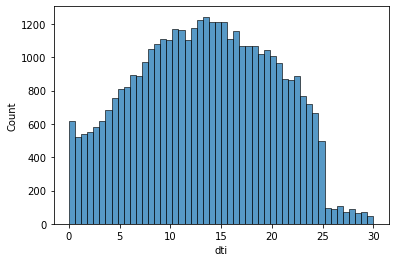

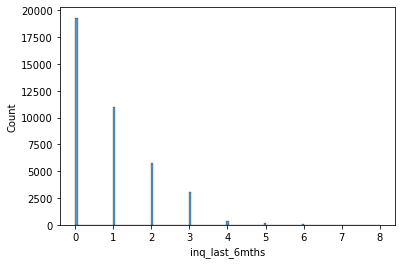

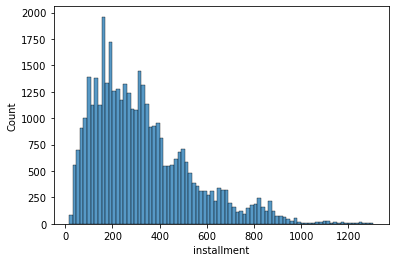

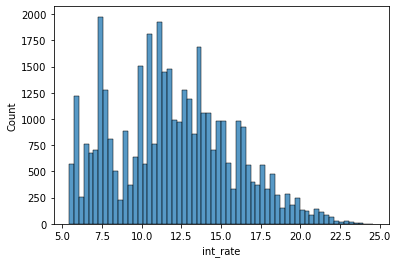

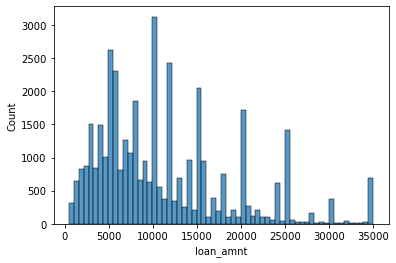

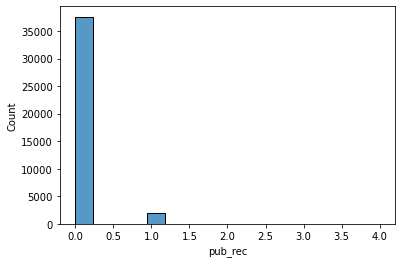

In [42]:
for col in continuous_cols:
    sns.histplot(x=loan_df[col])
    plt.show()

### Finding and Observition:
* annual_inc majority near to 0
* There is a big drop for DTI after 25.
* inq_last_6mths startr with highest value at 0, then decrease
* installment majority between 50 and 400
* majority of pub_rec at 0 to 2

### Categorical

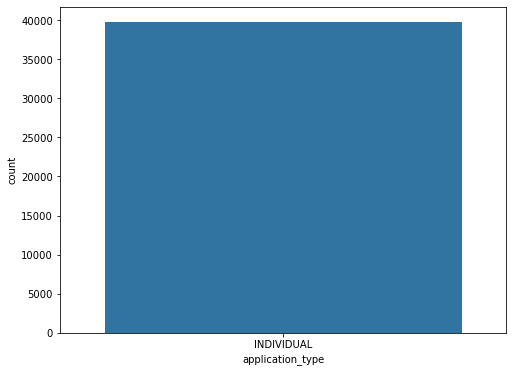

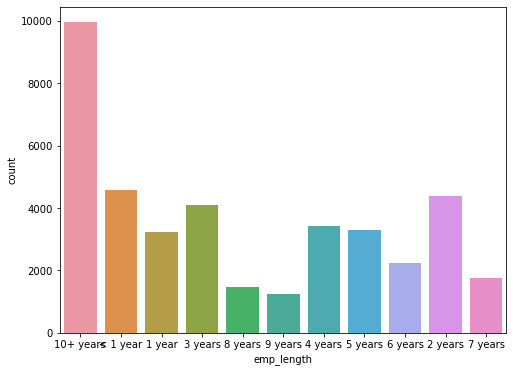

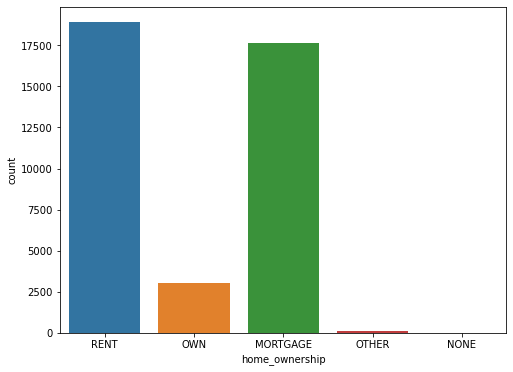

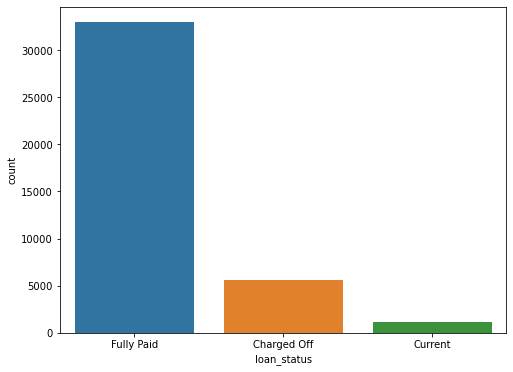

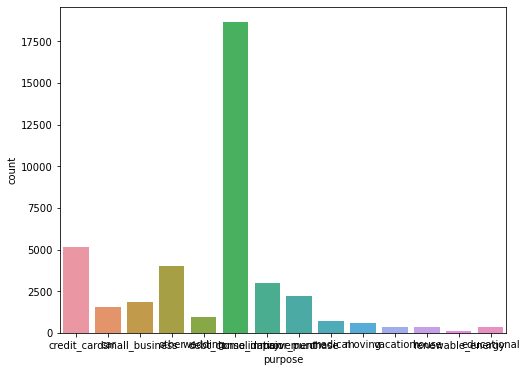

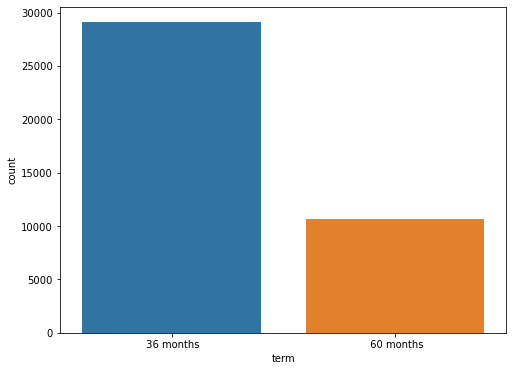

In [60]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(loan_df[col])
    plt.show()

### Observition and finding:
* The majority of emp_length is 10+.
* The majority of home_ownership is rent, then mortgage.
* The majority of loan_status is fully paid and charge off less than 75% of fully paid
* The majority of its purpose is debt consolidation.
* The majority of the term is 36 months (60 months, almost half 26 months).

---------
## Bivariate Analysis

### Numerical Vs Numerical`

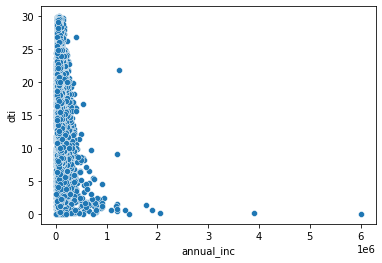

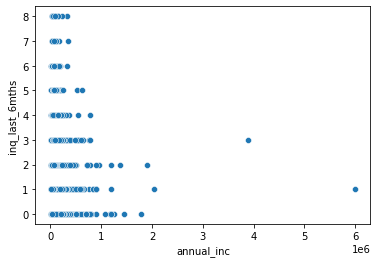

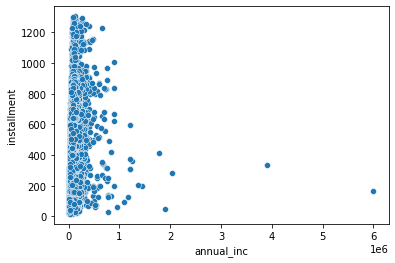

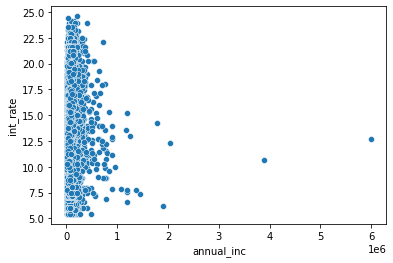

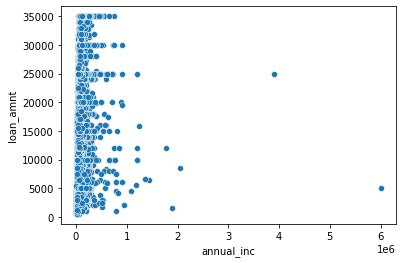

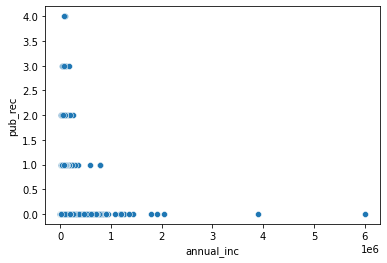

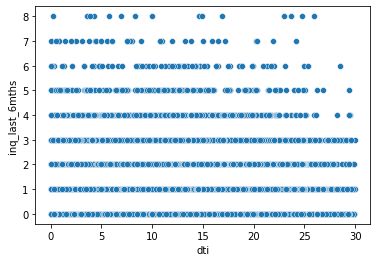

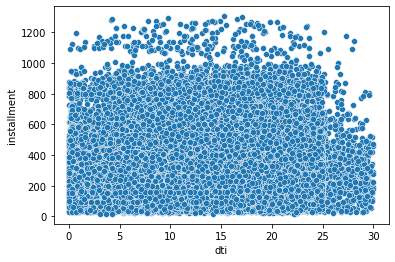

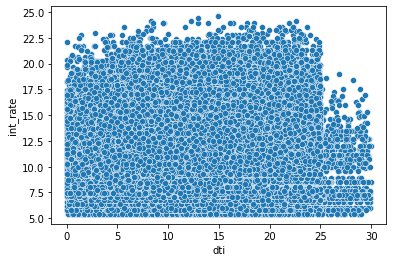

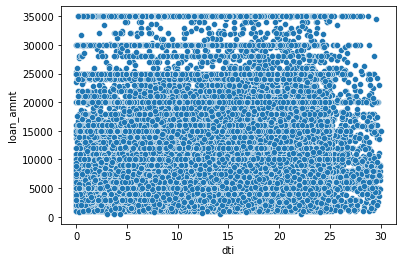

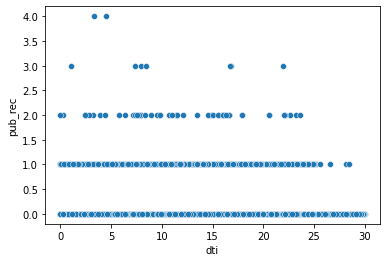

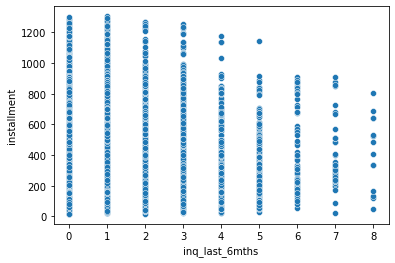

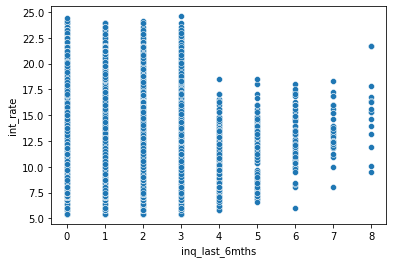

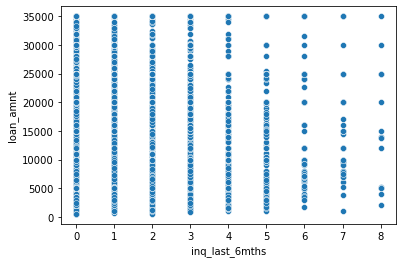

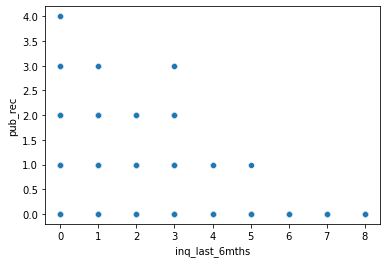

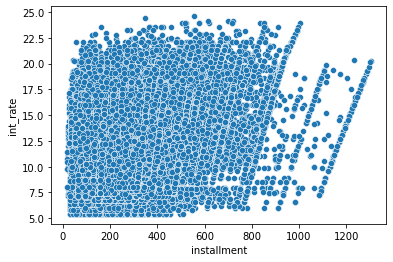

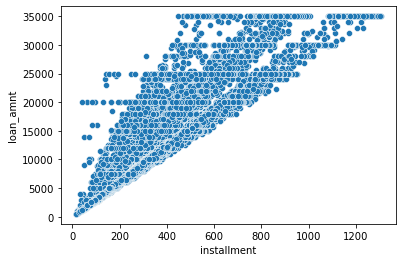

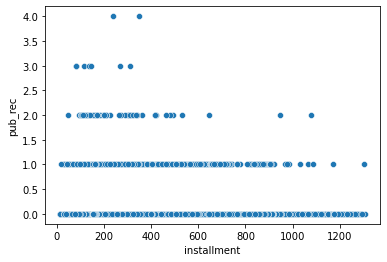

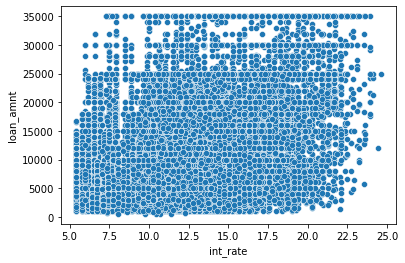

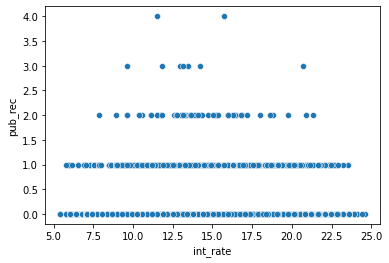

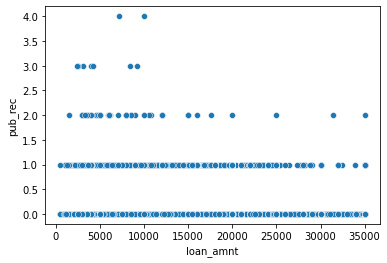

In [45]:
for i in range(len(continuous_cols)):
    for j in range(i + 1, len(continuous_cols)):
        col1 = continuous_cols[i]
        col2 = continuous_cols[j]
        sns.scatterplot(x=loan_df[col1], y=loan_df[col2])
        plt.show()

### Observiation and finding:
* There are outliers between annual_inc and inq_last_6mths
* The majority of annual_inc values between 0 and 2, while 0 for pub_rec
* The majority of pub_rec between 0 and 1 while distributed in DTI
* The aloan_amnt and installment have a positive relationship as they increase together.

-------------
### Numerical Vs Categorical

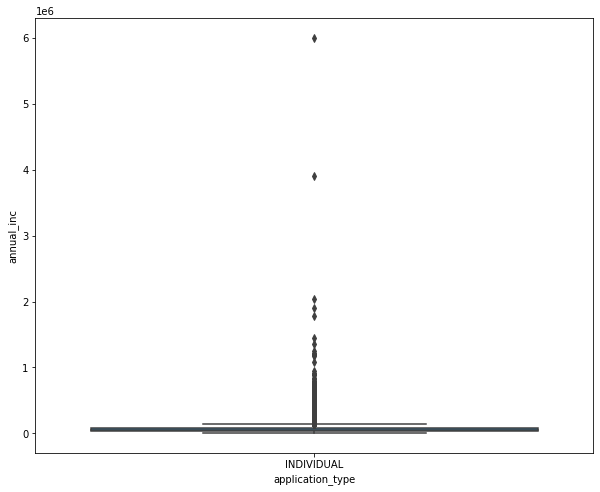

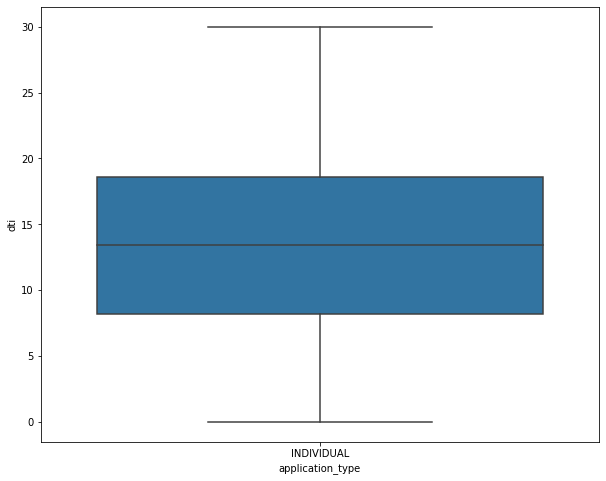

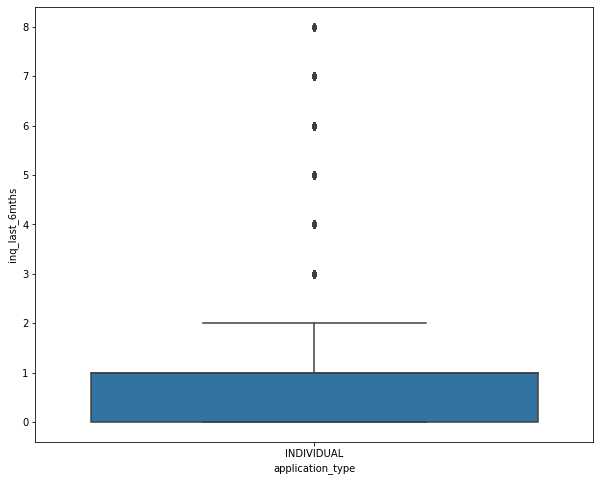

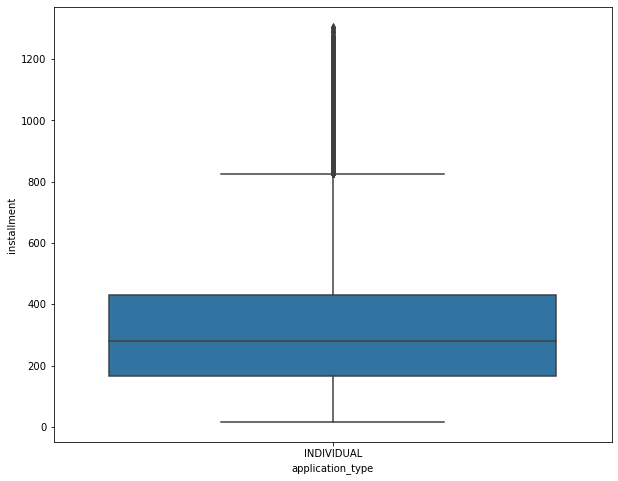

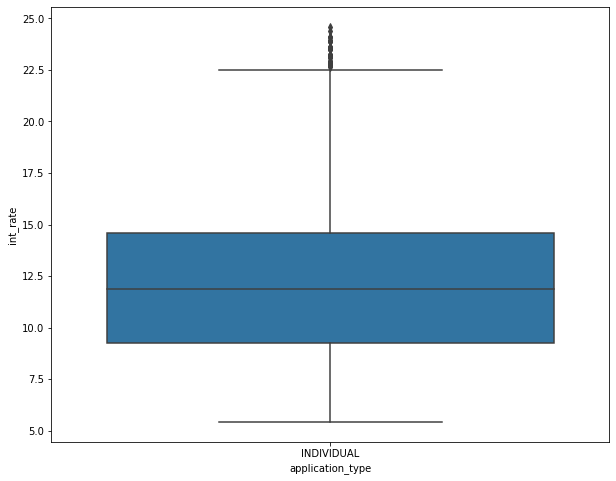

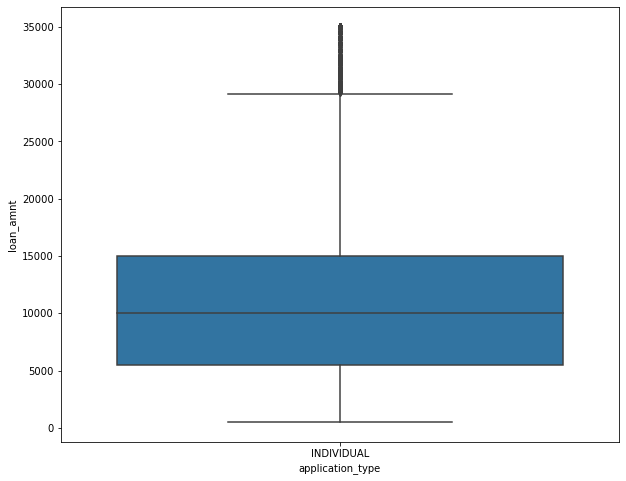

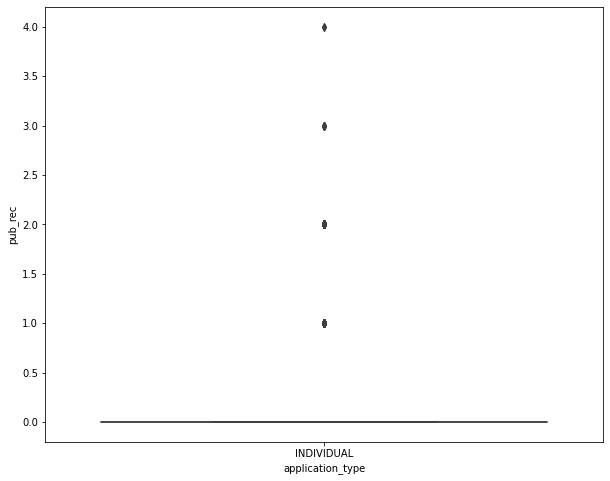

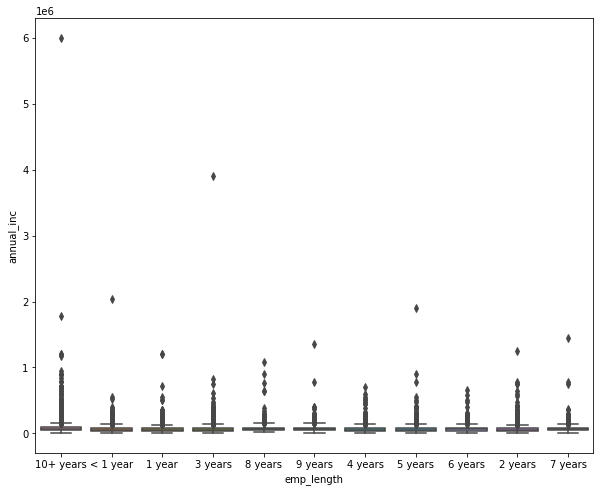

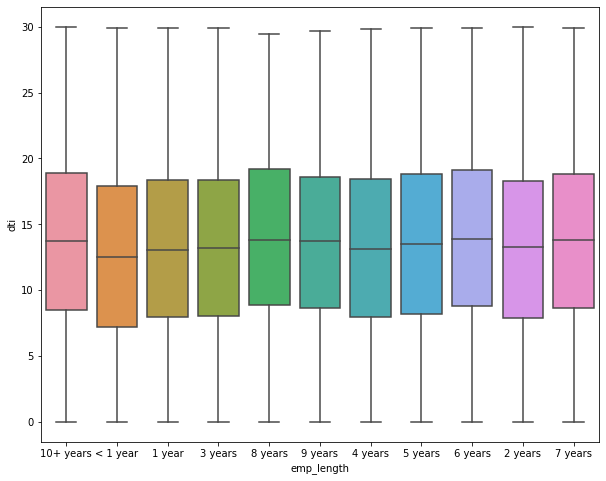

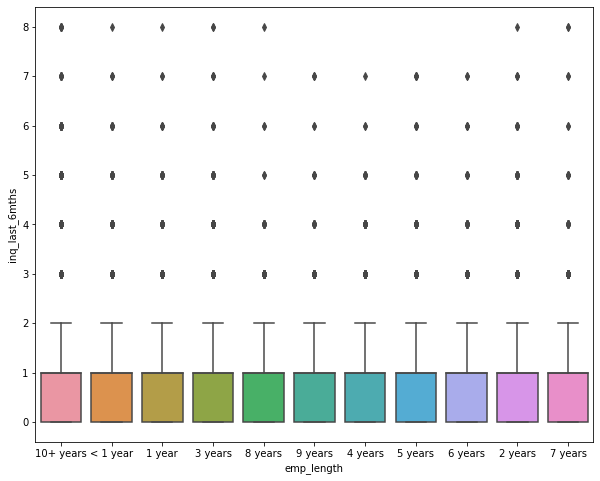

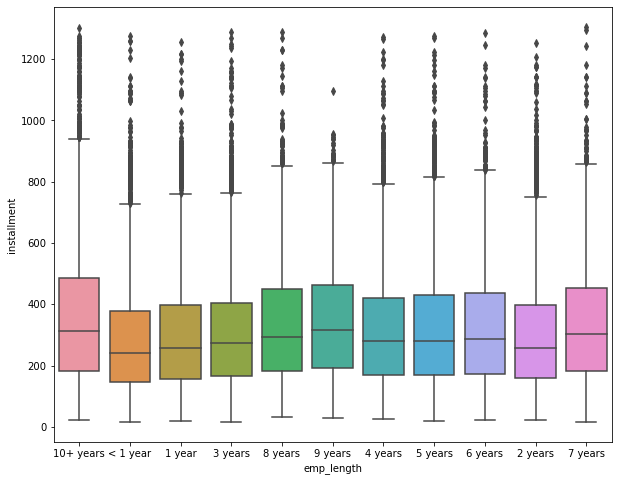

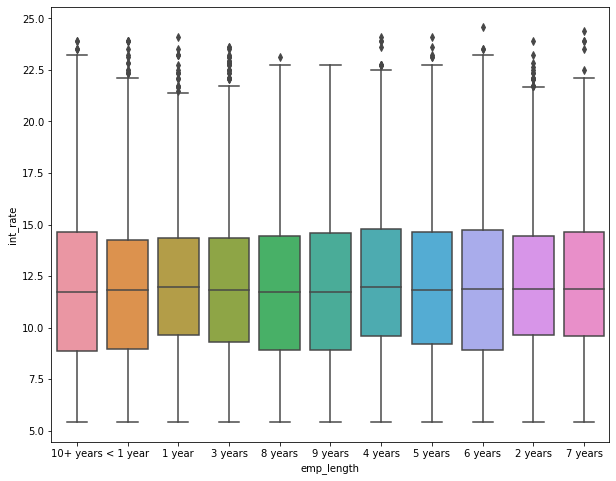

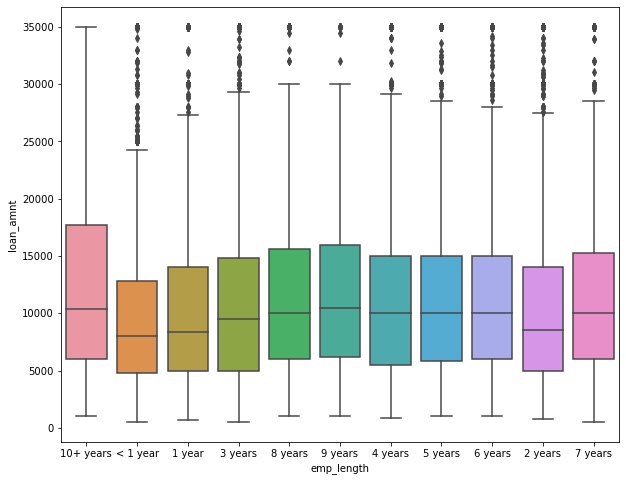

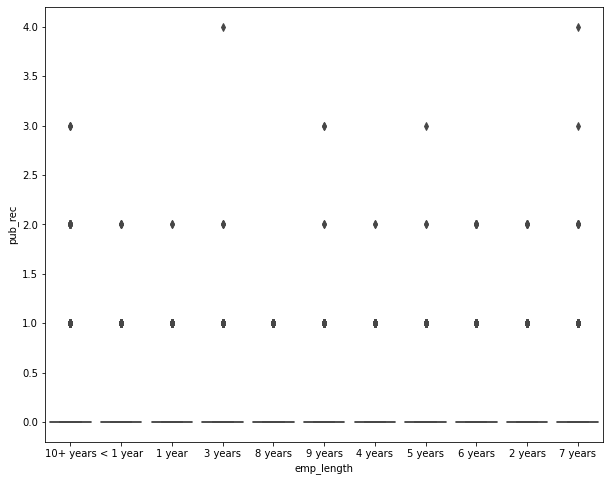

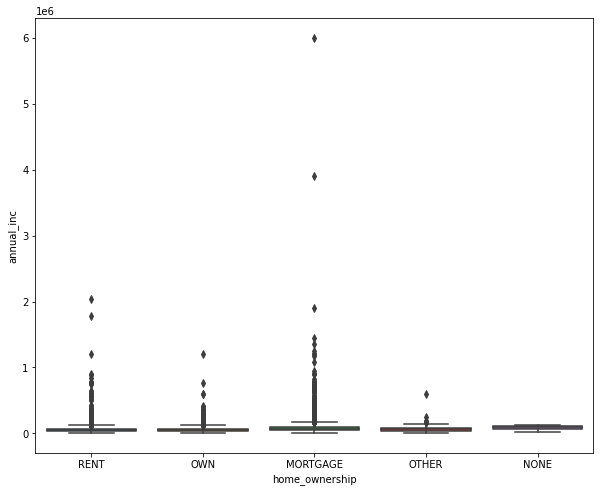

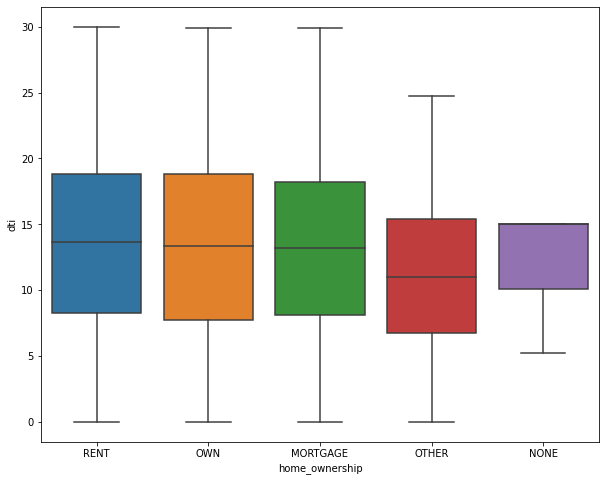

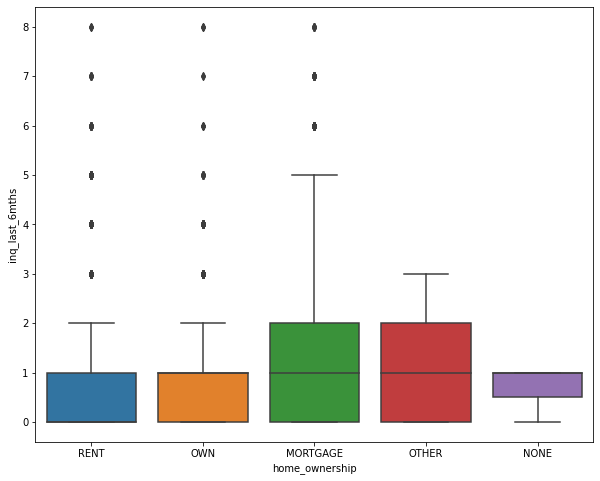

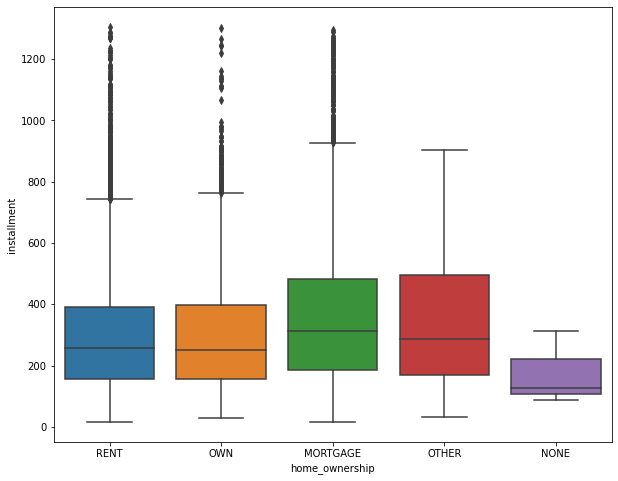

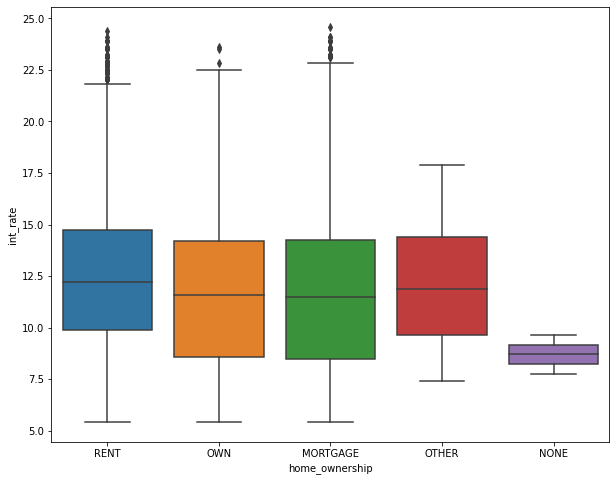

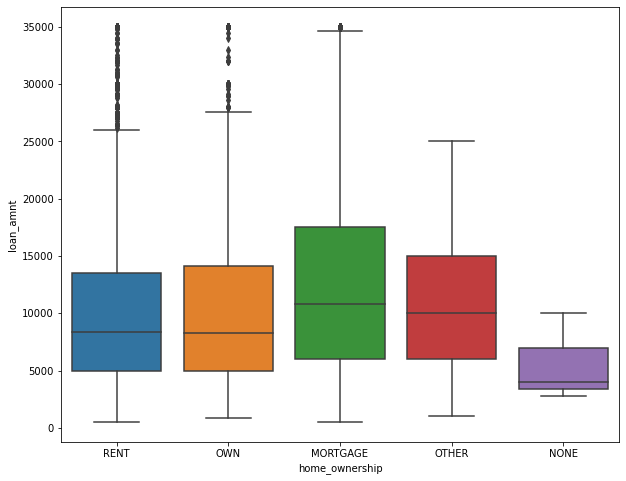

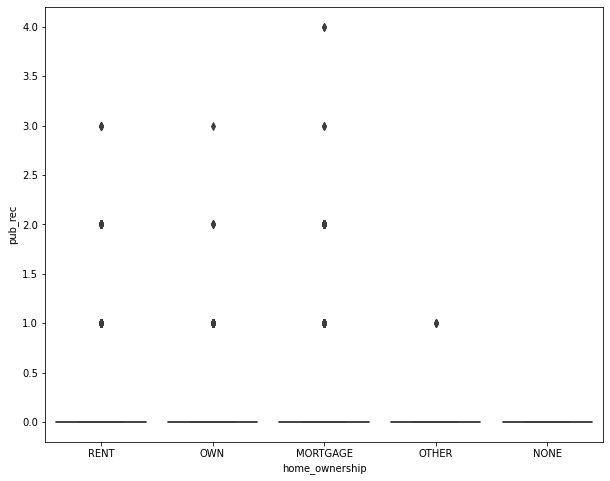

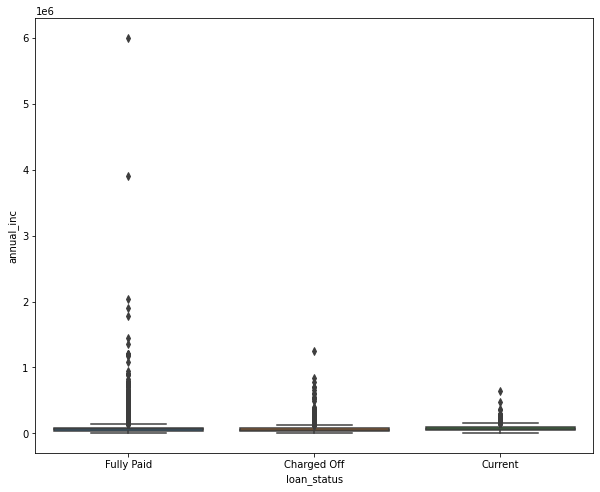

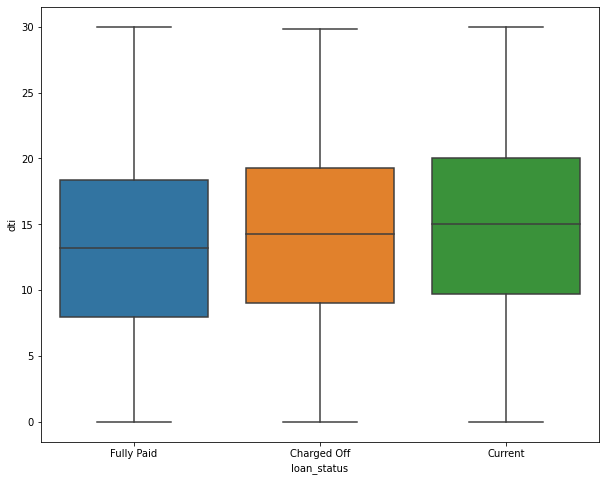

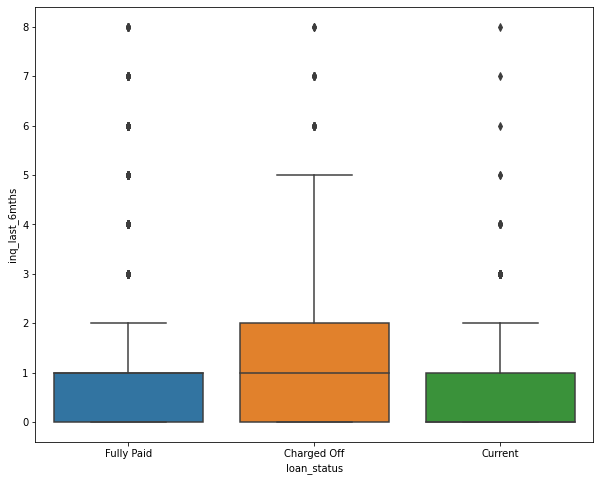

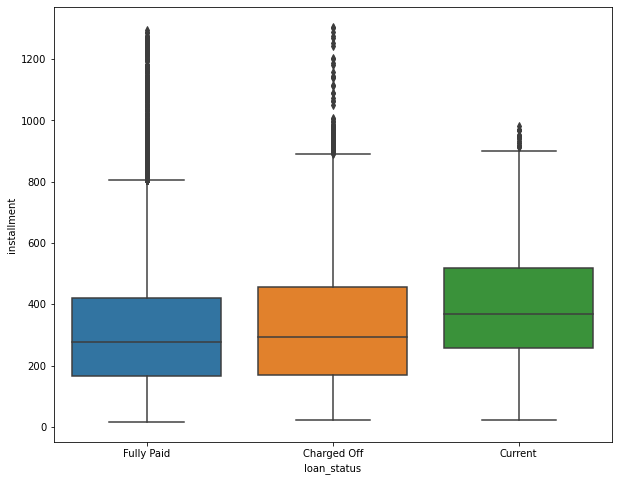

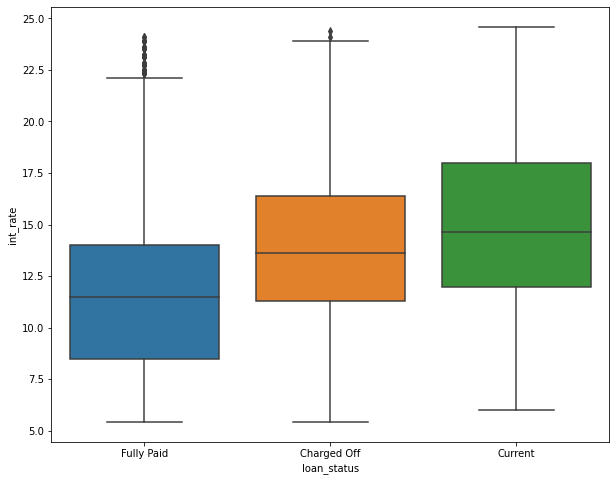

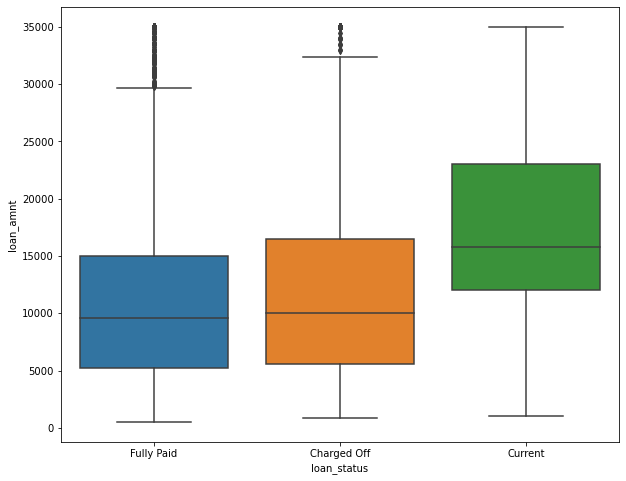

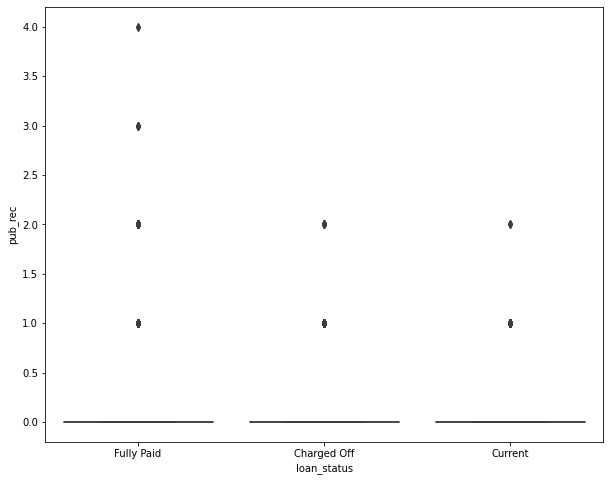

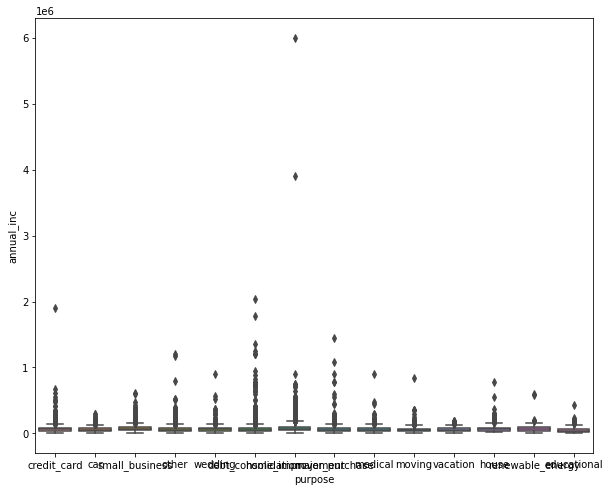

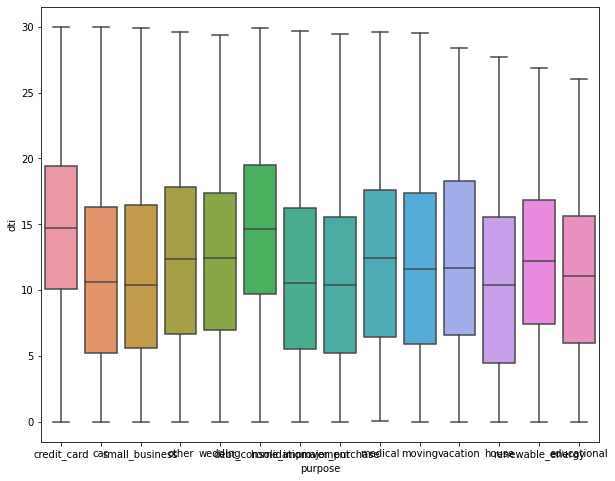

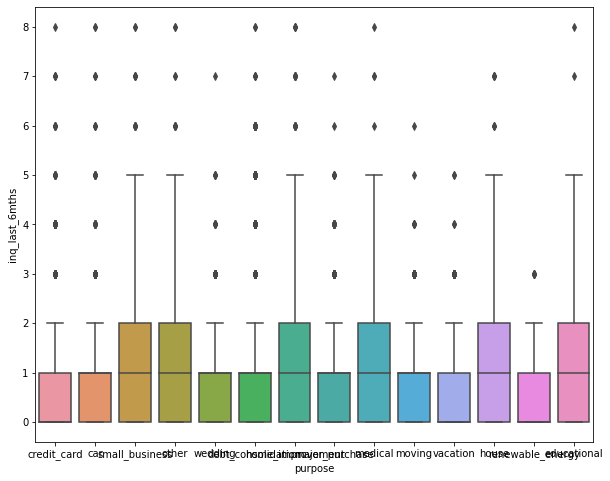

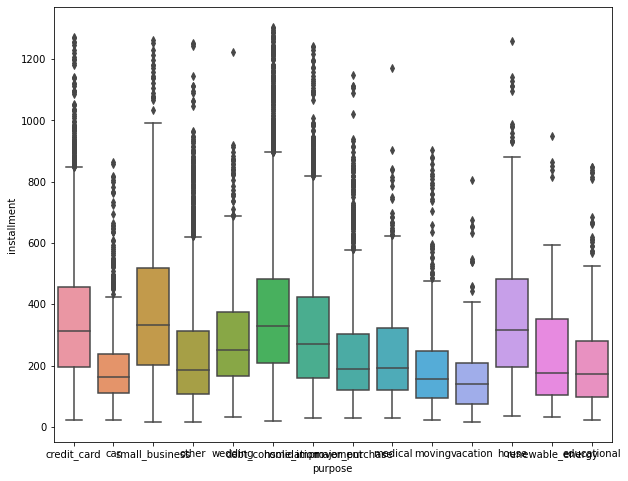

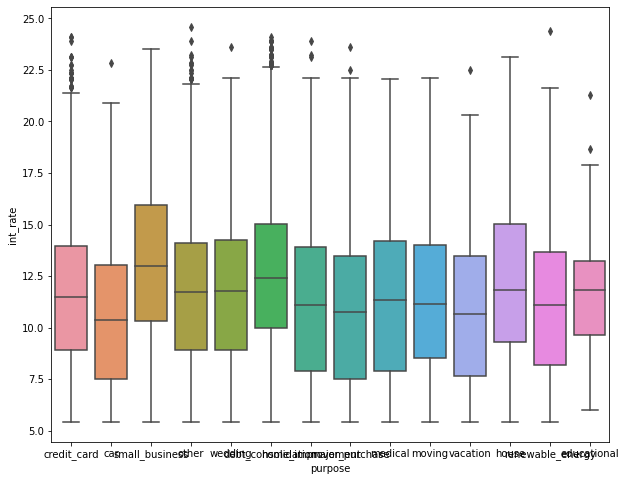

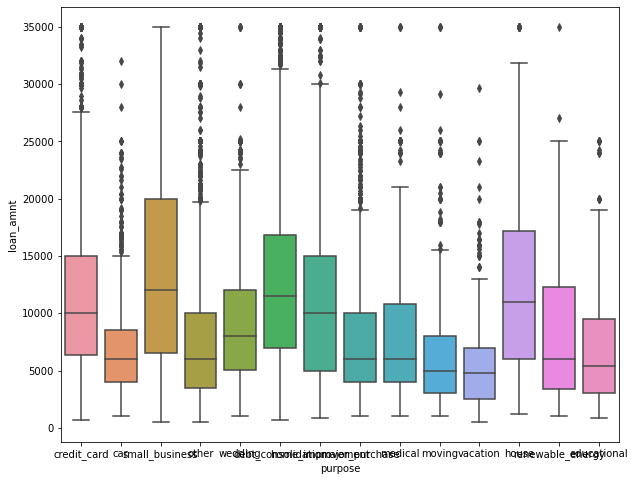

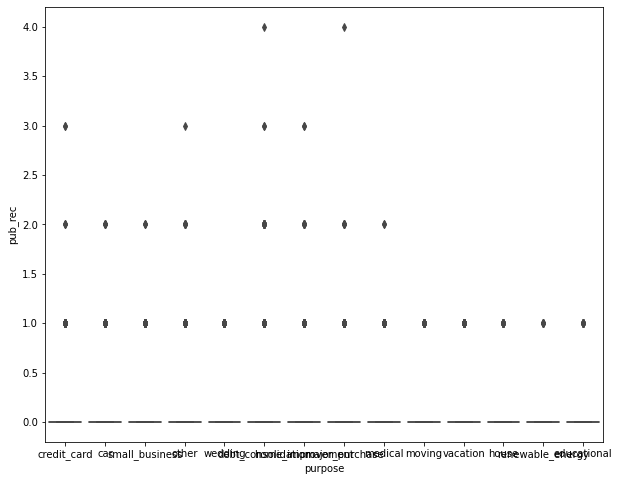

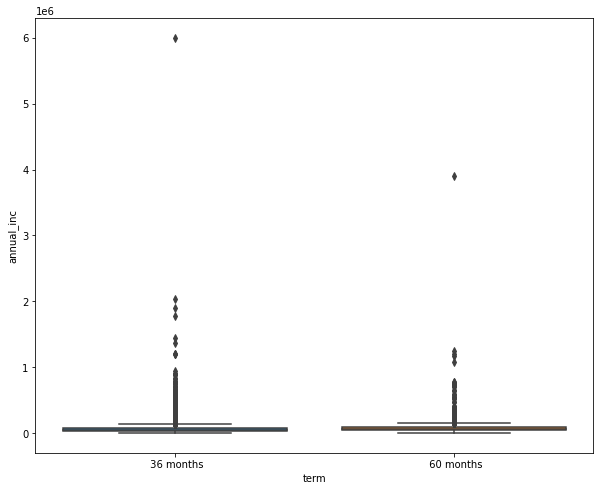

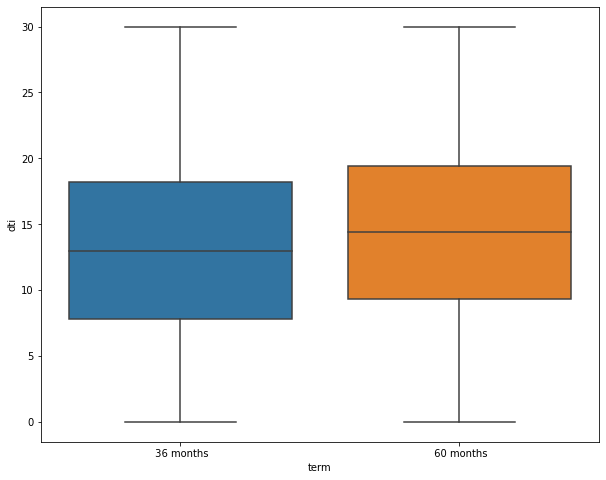

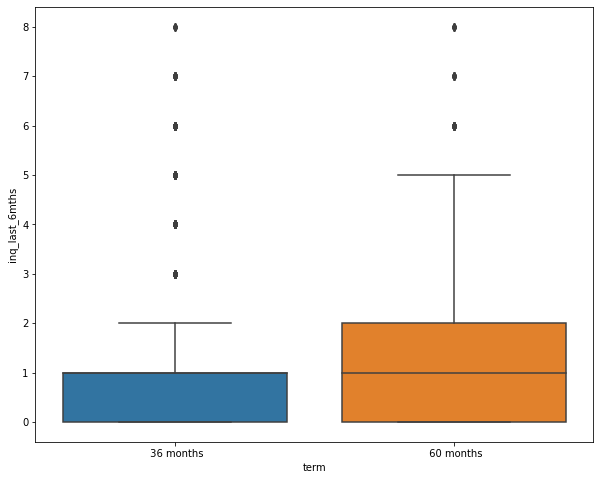

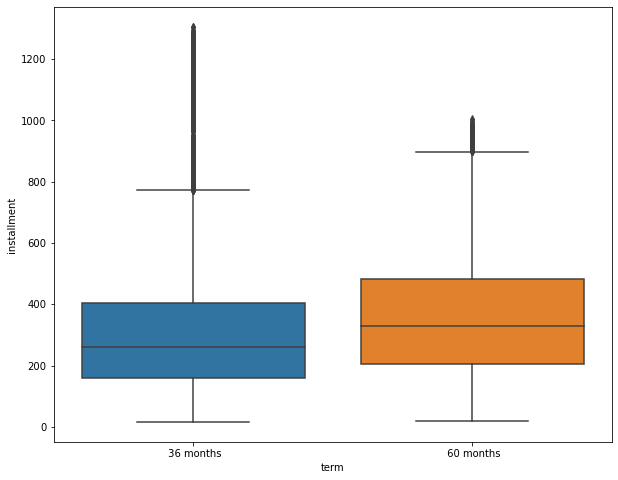

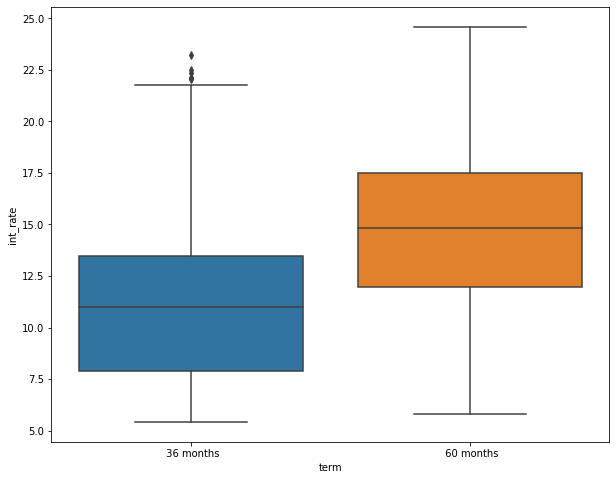

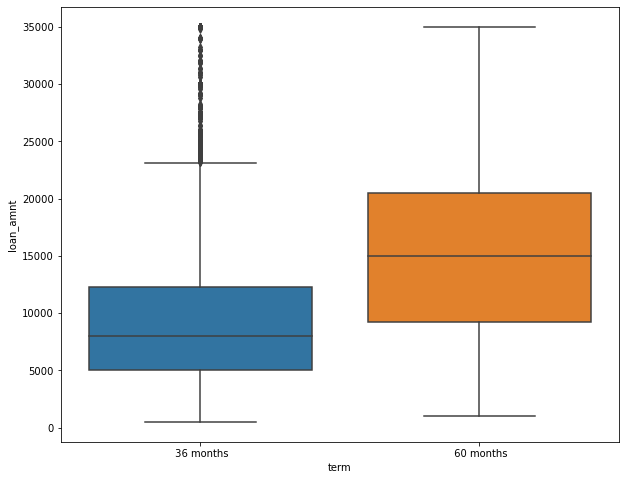

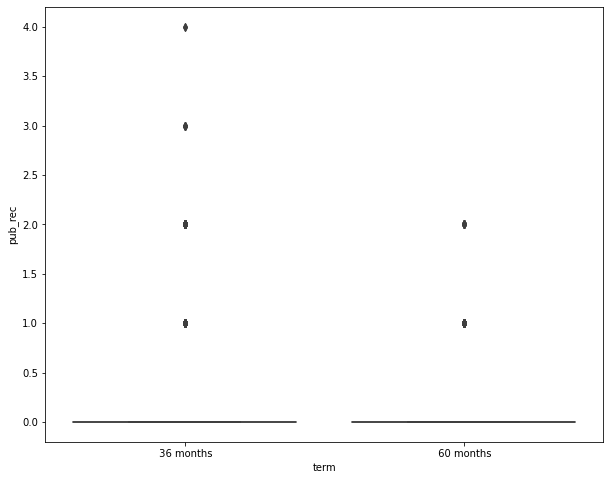

In [62]:
for col1 in categorical_cols :
    for col2 in continuous_cols :
        plt.figure(figsize=(10, 8))
        sns.boxplot(x=loan_df[col1],y=loan_df[col2])
        plt.show()

### Observations and finding:
* The majority of application_type has 0 annual_inc
* The majority of application_type between 8 and 19 for dti
* The majority of application_type between 0 and 1 for inq_last_6mths.
* The majority of application_type between ~200 and ~ 400 for installment
* The majority of application_type between 9 to 15 for int_rate
* The majority of application_type between 5000 to 15000 for loan_amnt
* The 60-month term is higher than the 36-month term for int_rate.
* The 60-month term is higher than the 36-month term for loan_amnt.

---------
### Multivariate analysis

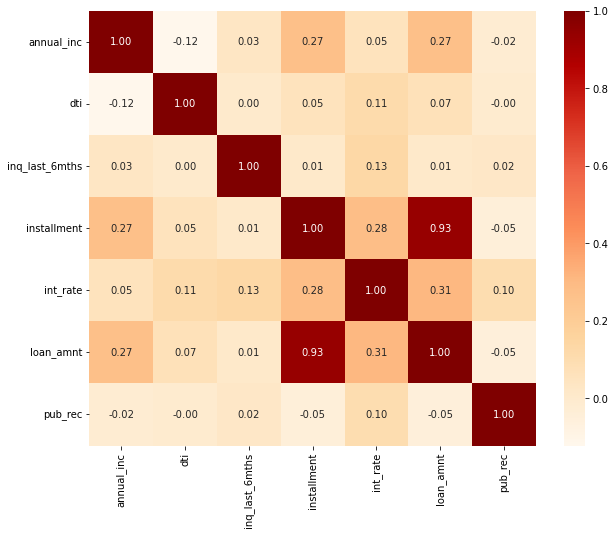

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(loan_df.corr(),annot=True,fmt='.2f',cmap="OrRd")
plt.show()

### Observations and finding:
* loan_amt has strong positive correlation with installment (0.93)
* loan_amt has positive correlation with int_rate (0.31)


In [49]:
# Calculate the correlation matrix
correlation_matrix = loan_df.corr()

In [50]:
correlation_matrix

,annual_inc,dti,inq_last_6mths,installment,int_rate,loan_amnt,pub_rec
annual_inc,1.000000,-0.122732,0.033908,0.270874,0.053185,0.271149,-0.018689
dti,-0.122732,1.000000,0.001405,0.054186,0.111162,0.066439,-0.004621
inq_last_6mths,0.033908,0.001405,1.000000,0.009722,0.133013,0.009229,0.024802
installment,0.270874,0.054186,0.009722,1.000000,0.282703,0.930288,-0.046532
int_rate,0.053185,0.111162,0.133013,0.282703,1.000000,0.309415,0.097208
loan_amnt,0.271149,0.066439,0.009229,0.930288,0.309415,1.000000,-0.051236
pub_rec,-0.018689,-0.004621,0.024802,-0.046532,0.097208,-0.051236,1.000000


In [54]:
# Calculate the correlation matrix
correlation_matrix_charge_off = loan_status_filtered_df.corr()

In [55]:
correlation_matrix_charge_off

,annual_inc,dti,inq_last_6mths,installment,int_rate,loan_amnt,pub_rec
annual_inc,1.000000,-0.089725,0.037303,0.358656,0.132252,0.352359,-0.006679
dti,-0.089725,1.000000,-0.028810,0.042358,0.040607,0.063872,0.007990
inq_last_6mths,0.037303,-0.028810,1.000000,0.018359,0.058475,0.007480,0.013126
installment,0.358656,0.042358,0.018359,1.000000,0.327909,0.925911,-0.041068
int_rate,0.132252,0.040607,0.058475,0.327909,1.000000,0.351216,0.079085
loan_amnt,0.352359,0.063872,0.007480,0.925911,0.351216,1.000000,-0.047690
pub_rec,-0.006679,0.007990,0.013126,-0.041068,0.079085,-0.047690,1.000000


### Recomendations:
* Applications with a big drop for DTI after 25 should be carefully reviewed.
* Installment majority between 50 and 400 should be given more weight in the decision-making process.
* Applications with emp_length majority at 10+ should be prioritized.
* Loans for debt consolidation purposes should be given preference.
* Preferably accept loan applications with a term of 36 months, as it is the majority.
* Strong positive correlation between loan_amnt and installment should be considered in loan approval decisions.
* Positive correlation between loan_amnt and int_rate should also be considered.